In [28]:
# Mass video download

import requests
from io import BytesIO
import os
import time
import random

print('imports completed ...')

# read the list of available camera numbers

# with open("camera.txt", 'r') as file:
#     cameras = [line.rstrip('\n') for line in file]
# file.close()

cameras = ['00001.01251','00001.01252','00001.01260','00001.01301','00001.01302','00001.01350',
           '00001.01400','00001.01401','00001.01402','00001.01403','00001.01404','00001.01406',
           '00001.01407','00001.01408','00001.01409','00001.01410','00001.01411','00001.01412',
           '00001.01413','00001.01414','00001.01416','00001.01417','00001.01418','00001.01419',
           '00001.01420','00001.01421','00001.01422','00001.01424','00001.01425','00001.01426',
           '00001.01427','00001.01428','00001.01429','00001.01430','00001.01432','00001.01433',
           '00001.01436','00001.01437','00001.01438','00001.01439','00001.01440','00001.01441',
           '00001.01442','00001.01445','00001.01460','00001.01462','00001.01467','00001.01502',
           '00001.01503','00001.01509','00001.01510','00001.01551','00001.01601','00001.01603',
           '00001.01604','00001.01605','00001.01606','00001.01607','00001.01611','00001.01615',
           '00001.01685','00001.02001','00001.02002','00001.02025','00001.02050','00001.02075',
           '00001.02080','00001.02100','00001.02101','00001.02102','00001.02103','00001.02104',
           '00001.02105','00001.02106','00001.02109','00001.02110','00001.02115','00001.02145',
           '00001.02146','00001.02147','00001.02150','00001.02151','00001.02152','00001.02154',
           '00001.02156','00001.02158','00001.02160','00001.02200','00001.02201','00001.02202',
           '00001.02204','00001.02205','00001.02206','00001.02252','00001.02253','00001.02254',
           '00001.02255','00001.02256','00001.02257','00001.02258','00001.02259','00001.02260',
           '00001.02262','00001.02263','00001.02264','00001.02265','00001.02267','00001.02268',
           '00001.02269','00001.02301','00001.02307','00001.02310','00001.02313','00001.02314',
           '00001.02315','00001.02331','00001.02335','00001.02339','00001.02342','00001.02351',
           '00001.02352','00001.02353','00001.02414','00001.02418','00001.02420','00001.02424',
           '00001.02425','00001.02431','00001.02433','00001.02434','00001.02453','00001.02500',
           '00001.02645','00001.02646','00001.02900','00001.03005','00001.03007','00001.03105',
           '00001.03108','00001.03111','00001.03115','00001.03118','00001.03125','00001.03205',
           '00001.03220','00001.03223','00001.03488','00001.03490','00001.03500','00001.03505',
           '00001.03506','00001.03507','00001.03540','00001.03551','00001.03553','00001.03555',
           '00001.03556','00001.03557','00001.03590','00001.03591','00001.03600','00001.03601',
           '00001.03603','00001.03604','00001.03606','00001.03608','00001.03609','00001.03610',
           '00001.03611','00001.03612','00001.03651','00001.03652','00001.03653','00001.03654',
           '00001.03656','00001.03657','00001.03659','00001.03660','00001.03662','00001.03663',
           '00001.03664','00001.03665','00001.03666','00001.03667','00001.03668','00001.03670',
           '00001.03671','00001.03672','00001.03674','00001.03675','00001.03680','00001.03700',
           '00001.03701','00001.03702','00001.03703','00001.03704','00001.03705','00001.03706',
           '00001.03707','00001.03708','00001.03712','00001.03718','00001.03720','00001.03721',
           '00001.03747','00001.03748','00001.03749','00001.03750','00001.03751','00001.03752',
           '00001.03753','00001.03754','00001.03755','00001.03756','00001.03757','00001.03758',
           '00001.03759','00001.03760','00001.03761','00001.03762','00001.03763','00001.03764',
           '00001.03765','00001.03766','00001.03767','00001.03768','00001.03769','00001.03770',
           '00001.03778','00001.03800','00001.03802','00001.03803','00001.03805','00001.03806',
           '00001.03808','00001.03809','00001.03810','00001.03811','00001.03812','00001.03813',
           '00001.03815','00001.03816','00001.03817','00001.03819','00001.03820','00001.03821',
           '00001.03822','00001.03824','00001.03825','00001.03826','00001.03835','00001.03850',
           '00001.03856','00001.03858','00001.03865','00001.03901','00001.03902','00001.03905',
           '00001.03950','00001.04005','00001.04150','00001.04214','00001.04220','00001.04223',
           '00001.04225','00001.04226','00001.04227','00001.04235','00001.04244','00001.04245',
           '00001.04250','00001.04252','00001.04254','00001.04255','00001.04256','00001.04275',
           '00001.04276','00001.04277','00001.04279','00001.04280','00001.04281','00001.04300',
           '00001.04303','00001.04304','00001.04305','00001.04322','00001.04324','00001.04327',
           '00001.04328','00001.04329','00001.04331','00001.04332','00001.04333','00001.04335',
           '00001.04336','00001.04338','00001.04339','00001.04340','00001.04341','00001.04342',
           '00001.04343','00001.04344','00001.04345','00001.04348','00001.04351','00001.04353',
           '00001.04354','00001.04355','00001.04375','00001.04376','00001.04377','00001.04407',
           '00001.04427','00001.04451','00001.04473','00001.04474','00001.04476','00001.04477',
           '00001.04485','00001.04486','00001.04500','00001.04502','00001.04503','00001.04505',
           '00001.04506','00001.04507','00001.04510','00001.04511','00001.04512','00001.04513',
           '00001.04514','00001.04515','00001.04516','00001.04518','00001.04519','00001.04520',
           '00001.04521','00001.04522','00001.04523','00001.04524','00001.04526','00001.04527',
           '00001.04528','00001.04529','00001.04530','00001.04532','00001.04533','00001.04534',
           '00001.04535','00001.04536','00001.04540','00001.04541','00001.04542','00001.04545',
           '00001.04546','00001.04548','00001.04549','00001.04550','00001.04551','00001.04553',
           '00001.04554','00001.04560','00001.04561','00001.04562','00001.04563','00001.04564',
           '00001.04565','00001.04567','00001.04568','00001.04569','00001.04570','00001.04572',
           '00001.04573','00001.04575','00001.04601','00001.04604','00001.04605','00001.04606',
           '00001.04607','00001.04608','00001.04609','00001.04610','00001.04611','00001.04613',
           '00001.04614','00001.04615','00001.04616','00001.04618','00001.04620','00001.04621',
           '00001.04622','00001.04623','00001.04624','00001.04626','00001.04627','00001.04629',
           '00001.04630','00001.04631','00001.04632','00001.04633','00001.04634','00001.04636',
           '00001.04637','00001.04638','00001.04639','00001.04640','00001.04641','00001.04642',
           '00001.04643','00001.04644','00001.04646','00001.04648','00001.04649','00001.04650',
           '00001.04651','00001.04653','00001.04654','00001.04655','00001.04656','00001.04658',
           '00001.04659','00001.04660','00001.04661','00001.04662','00001.04663','00001.04664',
           '00001.04665','00001.04666','00001.04667','00001.04668','00001.04669','00001.04670',
           '00001.04672','00001.04674','00001.04675','00001.04676','00001.04678','00001.04679',
           '00001.04680','00001.04683','00001.04684','00001.04690','00001.04750','00001.04880',
           '00001.04901','00001.05750','00001.05752','00001.05825','00001.05826','00001.05827',
           '00001.05828','00001.05829','00001.05830','00001.05831','00001.05832','00001.05900',
           '00001.05975','00001.05976','00001.05982','00001.06408','00001.06500','00001.06501',
           '00001.06502','00001.06503','00001.06504','00001.06506','00001.06507','00001.06508',
           '00001.06509','00001.06510','00001.06511','00001.06512','00001.06514','00001.06515',
           '00001.06516','00001.06517','00001.06518','00001.06519','00001.06520','00001.06521',
           '00001.06522','00001.06530','00001.06549','00001.06550','00001.06551','00001.06552',
           '00001.06560','00001.06570','00001.06580','00001.06581','00001.06584','00001.06585',
           '00001.06586','00001.06587','00001.06590','00001.06592','00001.06594','00001.06595',
           '00001.06597','00001.06598','00001.06600','00001.06601','00001.06602','00001.06603',
           '00001.06604','00001.06605','00001.06607','00001.06608','00001.06609','00001.06610',
           '00001.06611','00001.06614','00001.06615','00001.06619','00001.06620','00001.06621',
           '00001.06622','00001.06623','00001.06624','00001.06625','00001.06640','00001.06641',
           '00001.06643','00001.06644','00001.06647','00001.06648','00001.06649','00001.06650',
           '00001.06660','00001.06680','00001.06683','00001.06686','00001.06688','00001.06692',
           '00001.06693','00001.06694','00001.06697','00001.06704','00001.06706','00001.06708',
           '00001.06710','00001.06711','00001.06712','00001.06713','00001.06714','00001.06716',
           '00001.06717','00001.06721','00001.06723','00001.06726','00001.06730','00001.06737',
           '00001.06738','00001.06739','00001.06740','00001.06741','00001.06742','00001.06743',
           '00001.06744','00001.06748','00001.06750','00001.06751','00001.06850','00001.06908',
           '00001.06910','00001.06914','00001.06920','00001.06921','00001.06923','00001.06948',
           '00001.07250','00001.07251','00001.07300','00001.07301','00001.07302','00001.07303',
           '00001.07304','00001.07305','00001.07307','00001.07308','00001.07309','00001.07310',
           '00001.07311','00001.07312','00001.07313','00001.07314','00001.07315','00001.07316',
           '00001.07317','00001.07318','00001.07319','00001.07320','00001.07321','00001.07322',
           '00001.07325','00001.07326','00001.07327','00001.07328','00001.07330','00001.07350',
           '00001.07351','00001.07352','00001.07354','00001.07355','00001.07356','00001.07357',
           '00001.07358','00001.07359','00001.07360','00001.07361','00001.07364','00001.07365',
           '00001.07367','00001.07369','00001.07370','00001.07373','00001.07374','00001.07375',
           '00001.07376','00001.07377','00001.07378','00001.07379','00001.07380','00001.07382',
           '00001.07385','00001.07386','00001.07387','00001.07389','00001.07390','00001.07391',
           '00001.07393','00001.07400','00001.07450','00001.07451','00001.07452','00001.07458',
           '00001.07500','00001.07550','00001.07551','00001.07552','00001.07553','00001.07554',
           '00001.07555','00001.07590','00001.07591','00001.07600','00001.07925','00001.07929',
           '00001.08000','00001.08001','00001.08002','00001.08003','00001.08005','00001.08006',
           '00001.08008','00001.08009','00001.08010','00001.08100','00001.08300','00001.08301',
           '00001.08302','00001.08303','00001.08305','00001.08306','00001.08401','00001.08402',
           '00001.08600','00001.08603','00001.08750','00001.08751','00001.08752','00001.08753',
           '00001.08850','00001.08851','00001.08853','00001.08854','00001.08855','00001.08856',
           '00001.08858','00001.08859','00001.08860','00001.08861','00001.08863','00001.08865',
           '00001.08923','00001.08925','00001.08926','00001.08950','00001.08951','00001.08953',
           '00001.08954','00001.08955','00001.08956','00001.08958','00001.08959','00001.08960',
           '00001.08961','00001.08962','00001.08963','00001.08965','00001.08967','00001.08968',
           '00001.08980','00001.08982','00001.09049','00001.09050','00001.09051','00001.09053',
           '00001.09054','00001.09055','00001.09056','00001.09057','00001.09060','00001.09061',
           '00001.09064','00001.09078','00001.09080','00001.09088','00001.09096','00001.09401',
           '00001.09402','00001.09403','00001.09550','00001.09551','00001.09554','00001.09560',
           '00001.09603','00001.09605','00001.09606','00001.09607','00001.09608','00001.09609',
           '00001.09610','00001.09612','00001.09614','00001.09615','00001.09616','00001.09619',
           '00001.09620','00001.09621','00001.09622','00001.09630','00001.09631','00001.09640',
           '00001.09641','00001.09642','00001.09650','00001.09701','00001.09702','00001.09703',
           '00001.09704','00001.09705','00001.09706','00001.09707','00001.09708','00001.09709',
           '00001.09710','00001.09711','00001.09712','00001.09714','00001.09716','00001.09718',
           '00001.09719','00001.09720','00001.09721','00001.09722','00001.09723','00001.09725',
           '00001.09726','00001.09730','00001.09731','00001.09732','00001.09738','00001.09740',
           '00001.09741','00001.09742','00001.09743','00001.09744','00001.09747','00001.09753',
           '00001.09755','00001.09800','00001.09801','00002.00100','00002.00101','00002.00102',
           '00002.00104','00002.00107','00002.00110','00002.00113','00002.00114','00002.00115',
           '00002.00116','00002.00252','00002.00254','00002.00260','00002.00262','00002.00265',
           '00002.00268','00002.00304','00002.00305','00002.00323','00002.00324','00002.00325',
           '00002.00326','00002.00327','00002.00329','00002.00330','00002.00332','00002.00333',
           '00002.00334','00002.00335','00002.00336','00002.00337','00002.00338','00002.00341',
           '00002.00342','00002.00343','00002.00344','00002.00345','00002.00347','00002.00348',
           '00002.00349','00002.00361','00002.00362','00002.00378','00002.00389','00002.00390',
           '00002.00403','00002.00421','00002.00422','00002.00433','00002.00434','00002.00435',
           '00002.00450','00002.00605','00002.00606','00002.00607','00002.00616','00002.00617',
           '00002.00618','00002.00619','00002.00620','00002.00621','00002.00622','00002.00623',
           '00002.00624','00002.00625','00002.00626','00002.00627','00002.00628','00002.00629',
           '00002.00630','00002.00631','00002.00632','00002.00633','00002.00634','00002.00635',
           '00002.00636','00002.00637','00002.00638','00002.00639','00002.00640','00002.00810',
           '00002.00811','00002.00813','00002.00815','00002.00816','00002.00820','00002.00821',
           '00002.00822','00002.00823','00002.00824','00002.00825','00002.00826','00002.00827',
           '00002.00828','00002.00829','00002.00830','00002.00831','00002.00838','00002.00840',
           '00002.00849','00002.00850','00002.00851','00002.00852','00002.00853','00002.00854',
           '00002.00856','00002.00857','00002.00858','00002.00859','00002.00860','00002.00861',
           '00002.00862','00002.00863','00002.00864','00002.00865','00002.00866','00002.00867',
           '00002.00868','00002.00869','00002.00870','00002.00871','00002.00876','00002.00877',
           '00002.00878','00002.00881','00002.00882','00002.00883','00002.00884']

print('list of cameras loaded ...')

imports completed ...
list of cameras loaded ...


In [ ]:
#while 1:
for camera in cameras:
    
    print(camera, end = '\r')
    
    try:
        response = requests.get("https://s3-eu-west-1.amazonaws.com/jamcams.tfl.gov.uk/"
                                 + camera + ".mp4")
    except requests.exceptions.RequestException as e:
        time.sleep(5)
        print('internet connection error...')
    
    
    if response.status_code == 200:
    
        with open("download/" + camera + str(random.randint(100,999)) + 
                 ".mp4", "wb") as file:
            file.write(BytesIO(response.content).getbuffer())
            file.close()

# get image from openCV

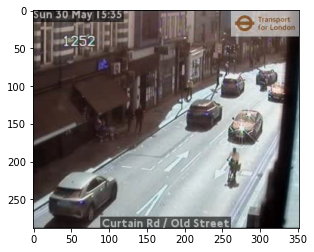

In [33]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

url = 'https://s3-eu-west-1.amazonaws.com/jamcams.tfl.gov.uk/' + cameras[1] + '.jpg'
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# for testing
plt.imshow(image)

In [35]:
cap = cv2.VideoCapture('https://s3-eu-west-1.amazonaws.com/jamcams.tfl.gov.uk/00001.06621.mp4')

In [42]:
ret,frame = cap.read()

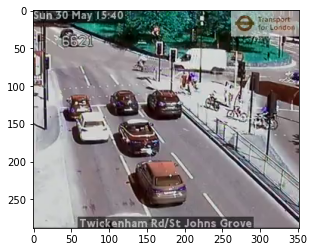

In [43]:
plt.imshow(frame)